In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('../../data/tidy/data-aggregation.csv', index_col=[0])

In [10]:
df.head()

,Geographic Area Name,Total!!Estimate!!Households,Median income (dollars)!!Estimate!!Households,Total!!Estimate!!HOUSEHOLD INCOME BY AGE OF HOUSEHOLDER!!15 to 24 years,Median income (dollars)!!Estimate!!HOUSEHOLD INCOME BY AGE OF HOUSEHOLDER!!15 to 24 years,Total!!Estimate!!HOUSEHOLD INCOME BY AGE OF HOUSEHOLDER!!25 to 44 years,Median income (dollars)!!Estimate!!HOUSEHOLD INCOME BY AGE OF HOUSEHOLDER!!25 to 44 years,Total!!Estimate!!HOUSEHOLD INCOME BY AGE OF HOUSEHOLDER!!45 to 64 years,Median income (dollars)!!Estimate!!HOUSEHOLD INCOME BY AGE OF HOUSEHOLDER!!45 to 64 years,Total!!Estimate!!HOUSEHOLD INCOME BY AGE OF HOUSEHOLDER!!65 years and over,...,FUELOIL (gallons),Vehicle miles traveled,Transport (tCO2e/yr),Housing (tCO2e/yr),Food (tCO2e/yr),Goods (tCO2e/yr),Services (tCO2e/yr),Total Household Carbon Footprint (tCO2/yr),Households,Total County Carbon Footprint (tCO2e/yr)
0,"Abilene, TX",60343,44249,8.9,23489,31.8,50304,34.9,54749,24.4,...,220.478974,192265.733198,15.657754,13.480262,7.577231,4.540864,4.916275,46.172386,100690.0,4.649098e+06
1,"Aguadilla-Isabela, PR",109620,15681,1.9,6603,27.6,16458,39.8,17419,30.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Akron, OH",281752,50776,5.2,19511,30.0,56281,40.9,62220,23.9,...,124.833129,115371.753755,15.995618,12.539551,7.604762,5.563126,6.291286,47.994344,227621.0,1.181086e+07
3,"Albany, GA",58250,36805,4.8,14867,32.8,36729,39.9,45370,22.5,...,45.432009,115472.584515,13.906133,14.077966,7.783972,4.548862,4.895082,45.212014,54985.0,2.485983e+06
4,"Albany, OR",44942,44965,4.9,21652,29.8,50436,38.3,55601,26.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
for column in df.columns:
    print(column)

Geographic Area Name
Total!!Estimate!!Households
Median income (dollars)!!Estimate!!Households
Total!!Estimate!!HOUSEHOLD INCOME BY AGE OF HOUSEHOLDER!!15 to 24 years
Median income (dollars)!!Estimate!!HOUSEHOLD INCOME BY AGE OF HOUSEHOLDER!!15 to 24 years
Total!!Estimate!!HOUSEHOLD INCOME BY AGE OF HOUSEHOLDER!!25 to 44 years
Median income (dollars)!!Estimate!!HOUSEHOLD INCOME BY AGE OF HOUSEHOLDER!!25 to 44 years
Total!!Estimate!!HOUSEHOLD INCOME BY AGE OF HOUSEHOLDER!!45 to 64 years
Median income (dollars)!!Estimate!!HOUSEHOLD INCOME BY AGE OF HOUSEHOLDER!!45 to 64 years
Total!!Estimate!!HOUSEHOLD INCOME BY AGE OF HOUSEHOLDER!!65 years and over
Median income (dollars)!!Estimate!!HOUSEHOLD INCOME BY AGE OF HOUSEHOLDER!!65 years and over
Geography_x
Estimate!!Total
Estimate!!Total!!Car, truck, or van
Estimate!!Total!!Car, truck, or van!!Drove alone
Estimate!!Total!!Car, truck, or van!!Carpooled
Estimate!!Total!!Car, truck, or van!!Carpooled!!In 2-person carpool
Estimate!!Total!!Car, t

In [5]:
y = df['Total County Carbon Footprint (tCO2e/yr)']

In [6]:
cols_to_plot = df.iloc[:, 1:]

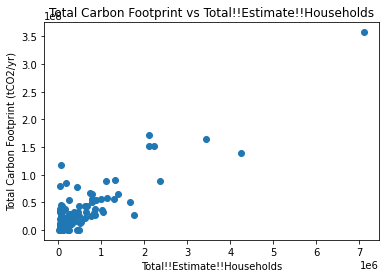

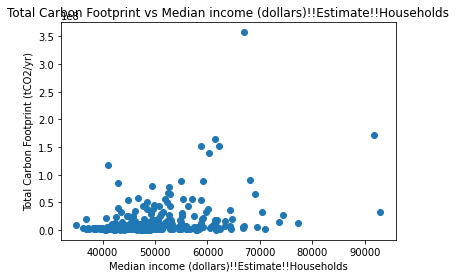

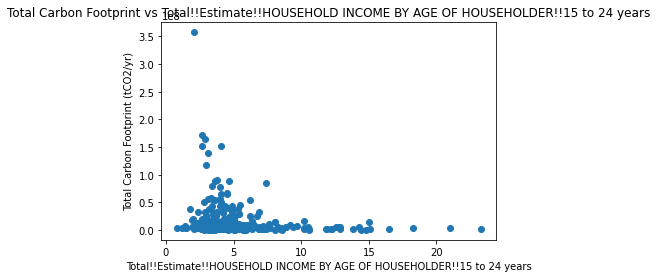

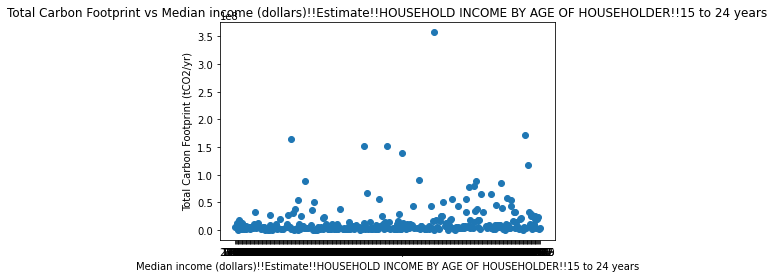

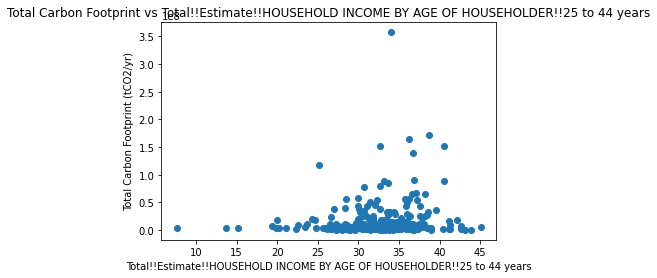

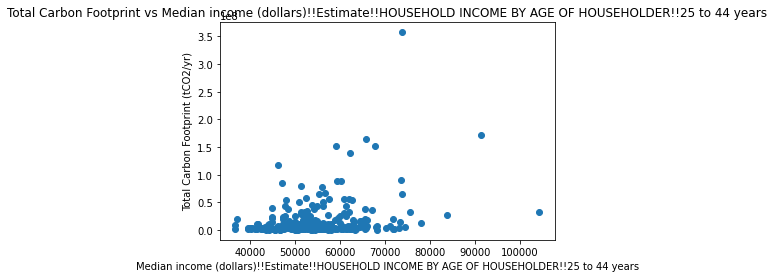

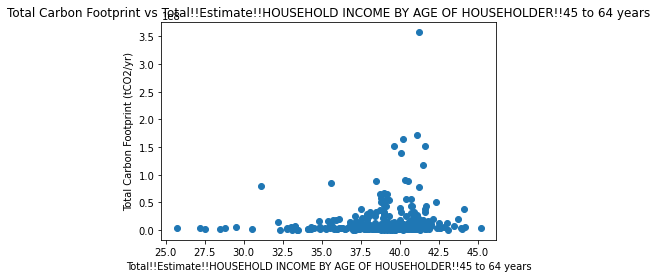

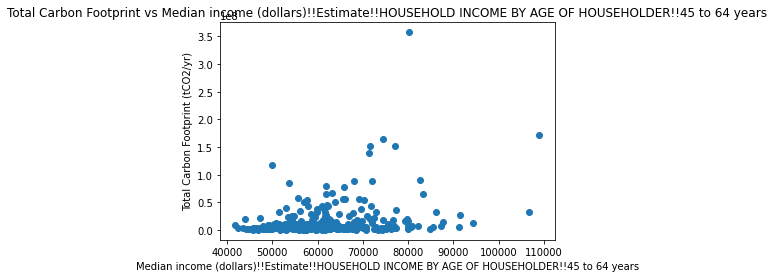

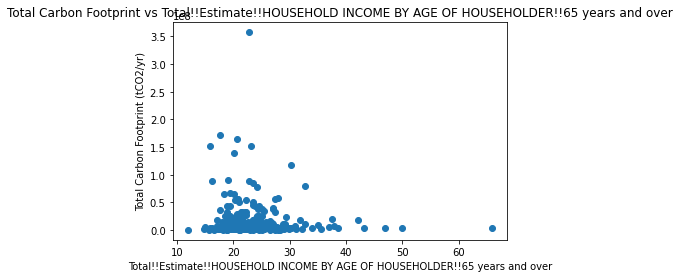

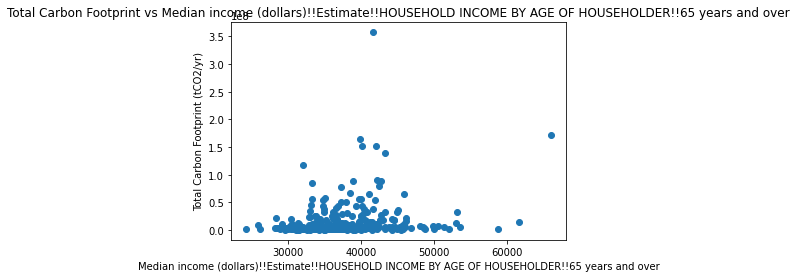

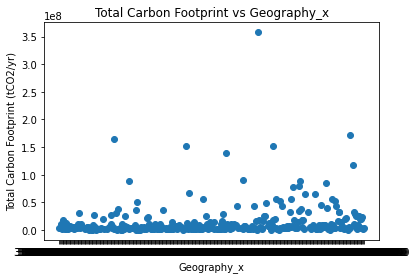

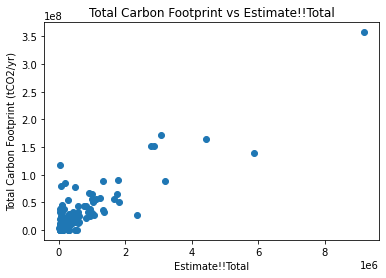

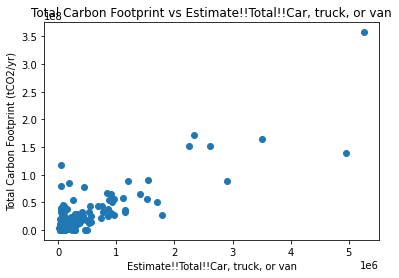

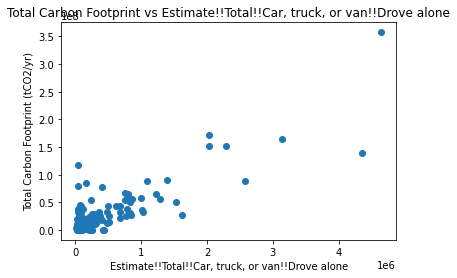

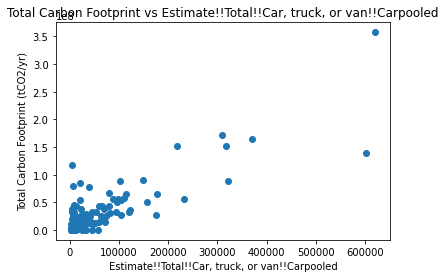

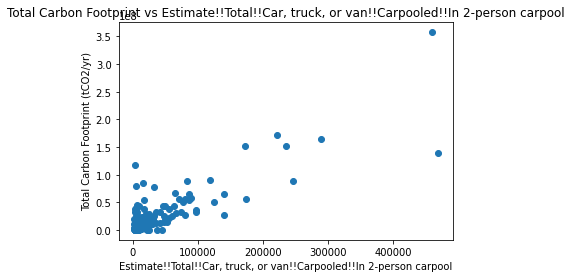

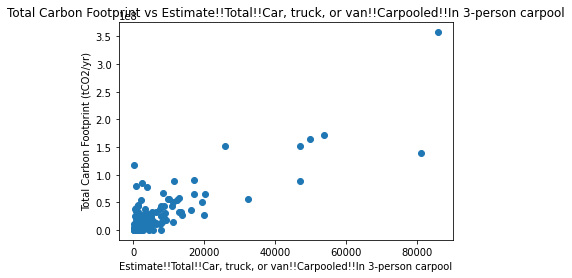

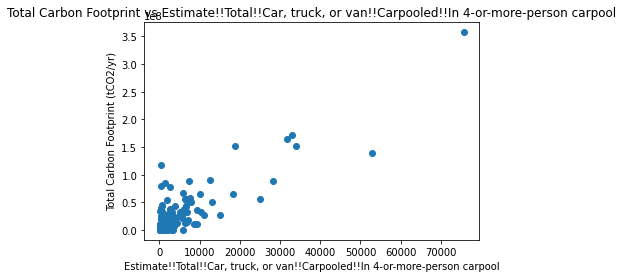

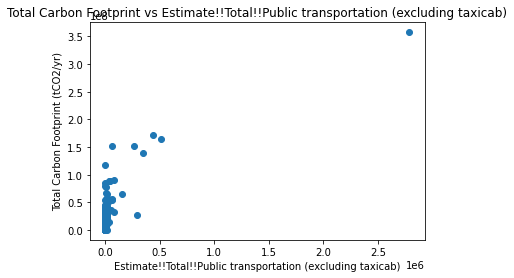

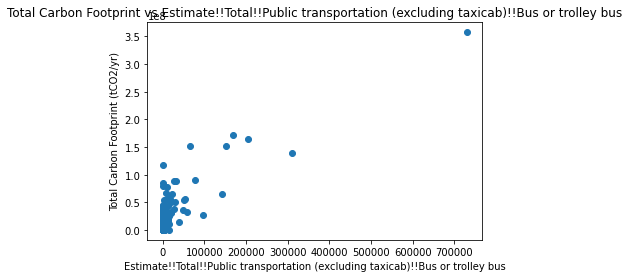

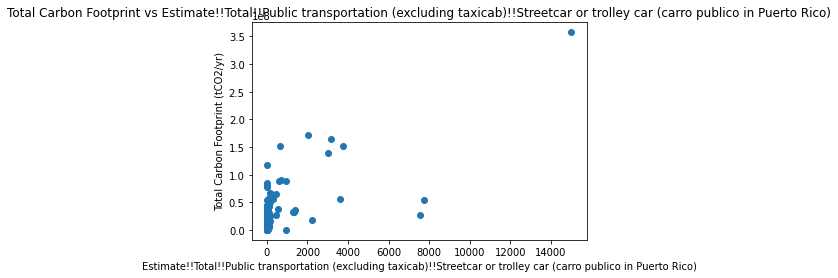

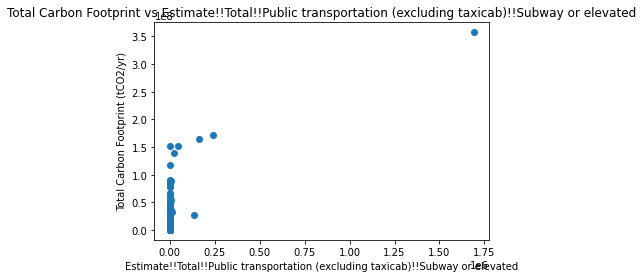

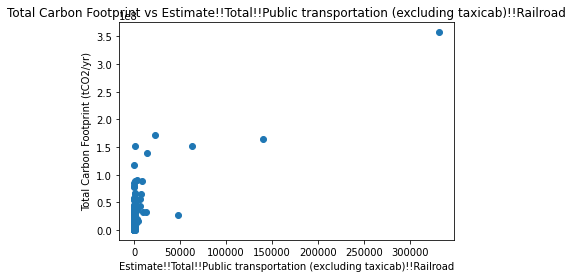

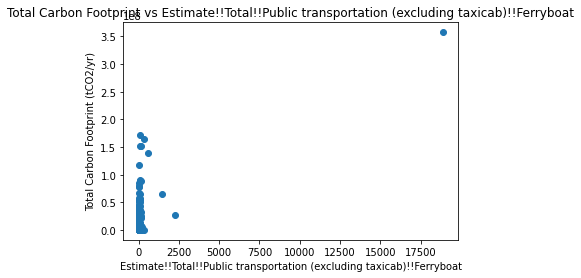

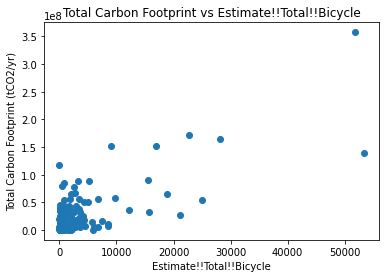

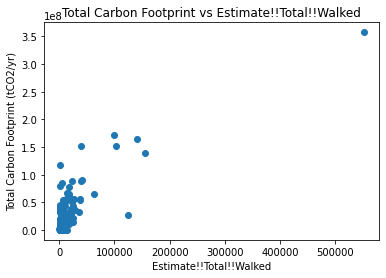

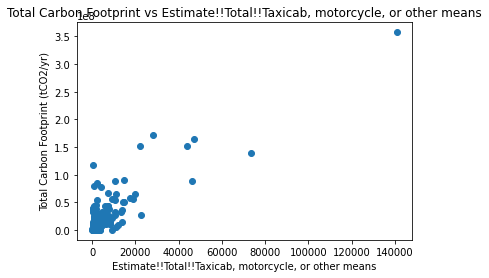

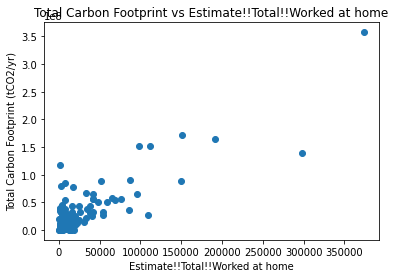

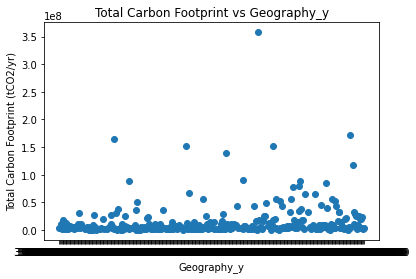

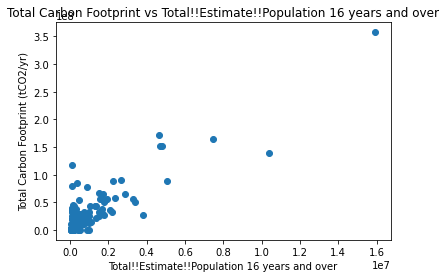

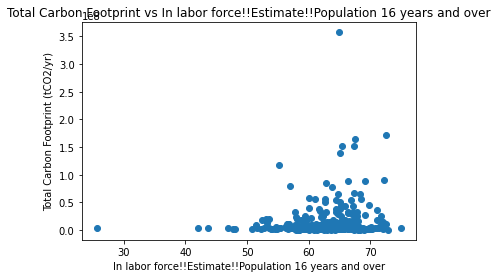

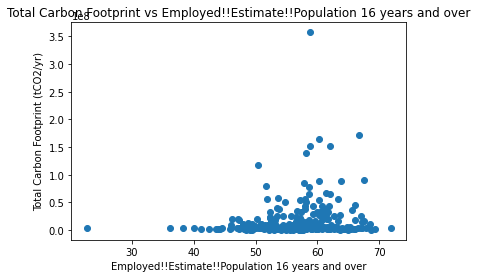

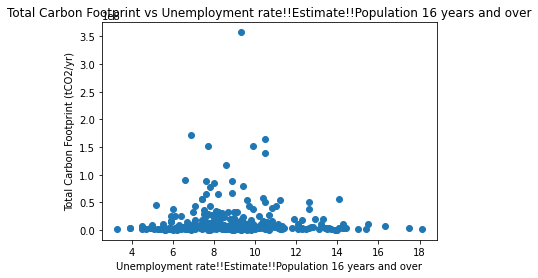

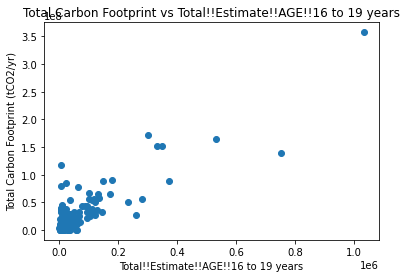

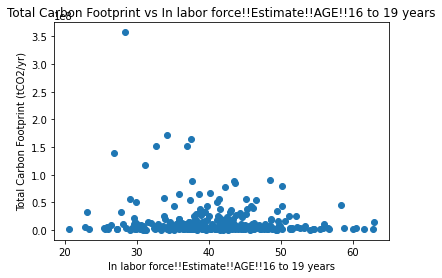

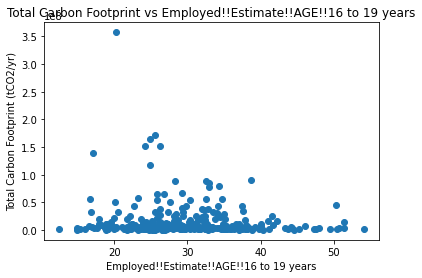

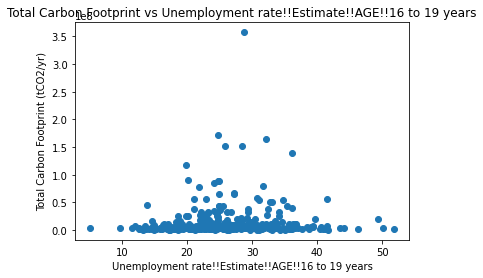

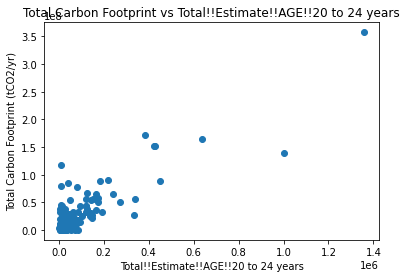

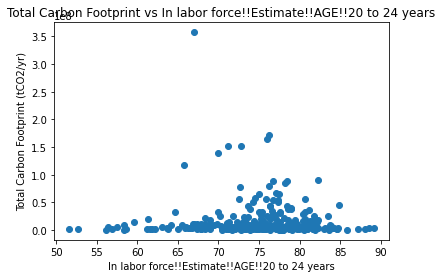

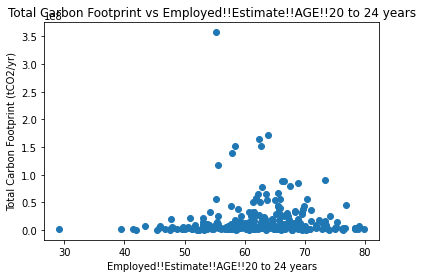

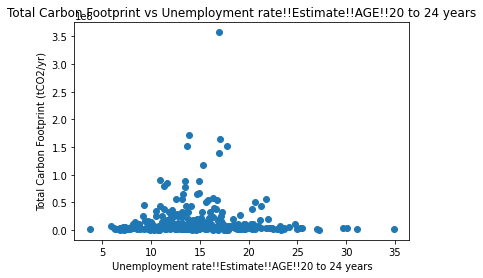

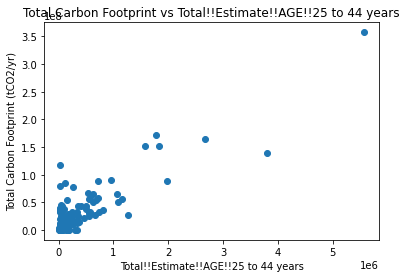

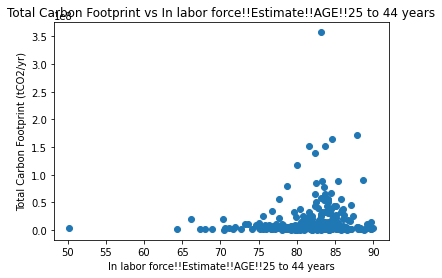

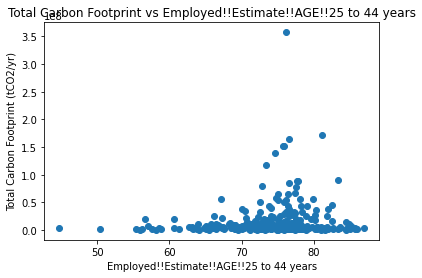

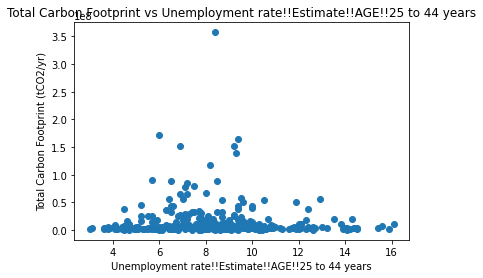

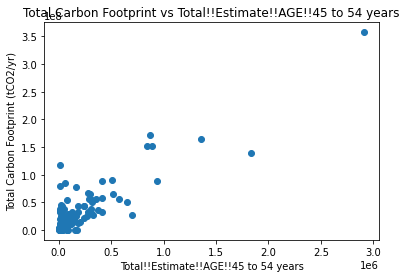

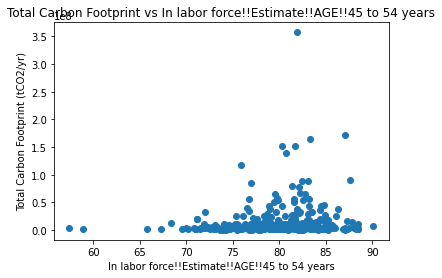

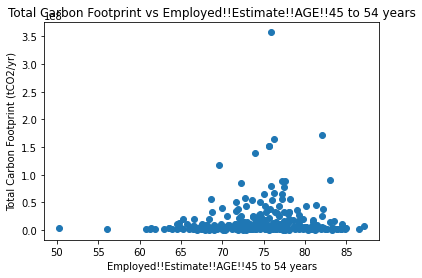

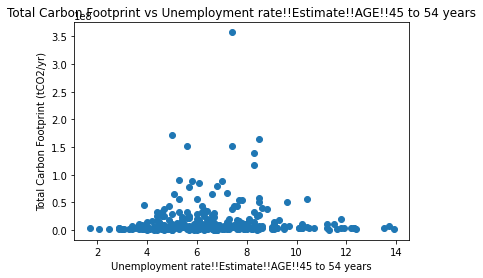

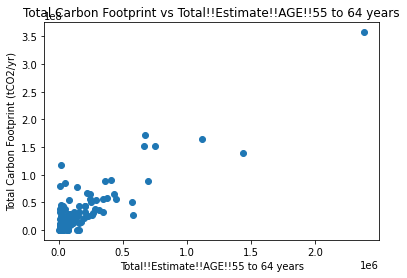

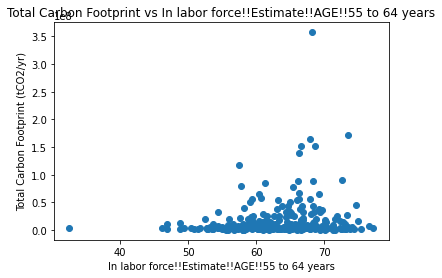

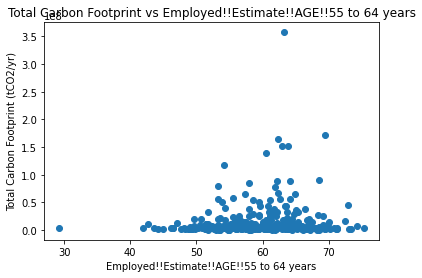

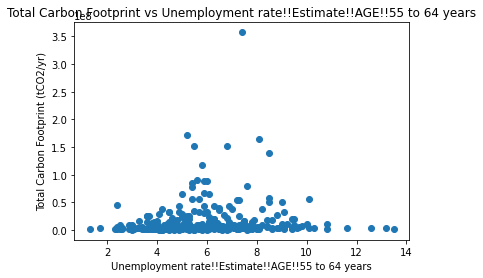

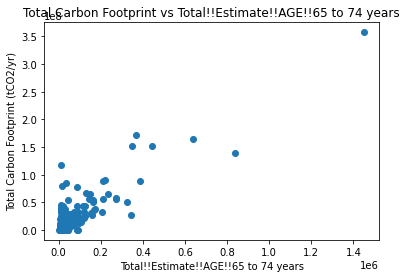

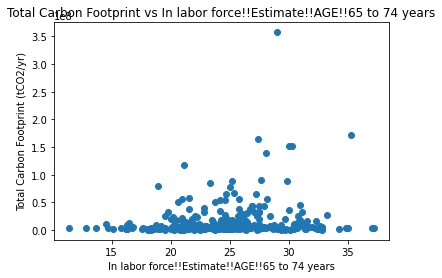

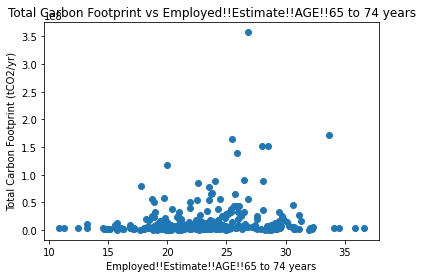

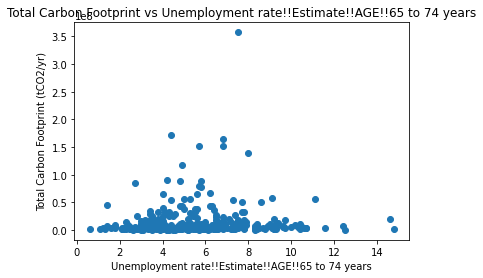

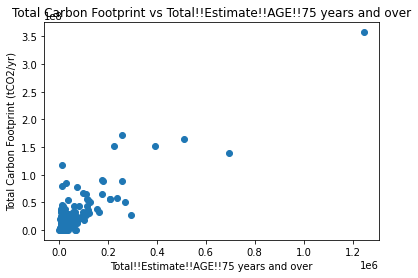

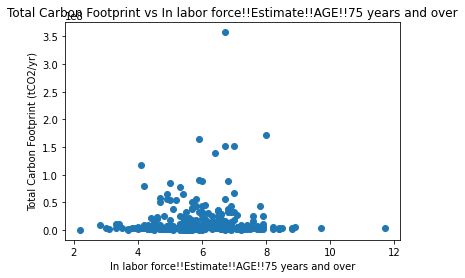

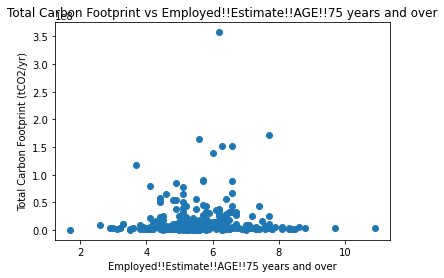

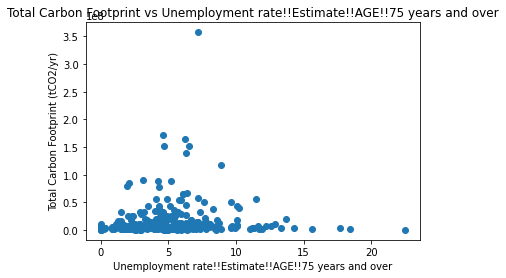

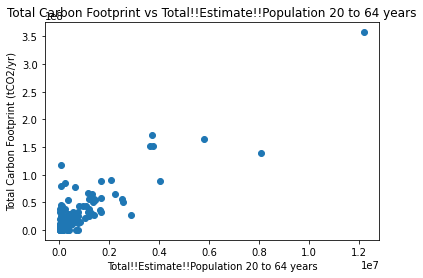

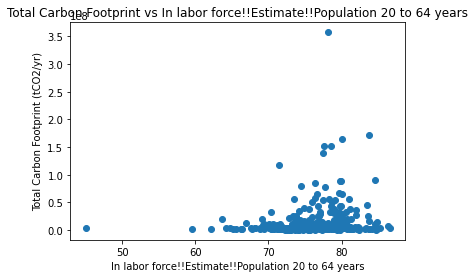

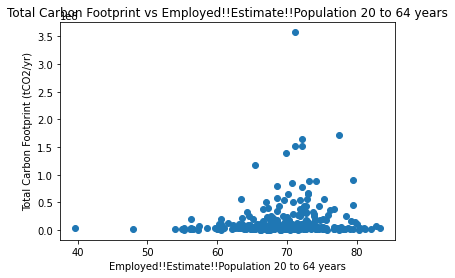

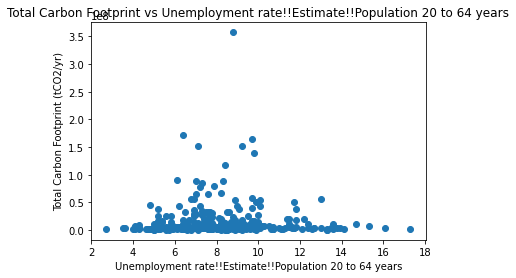

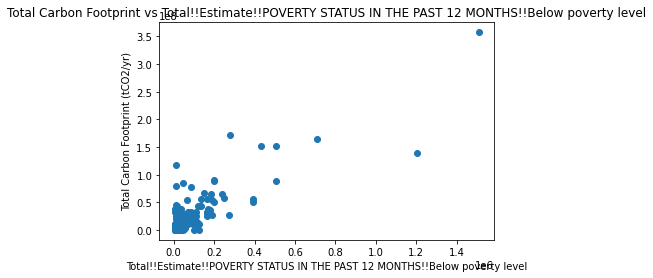

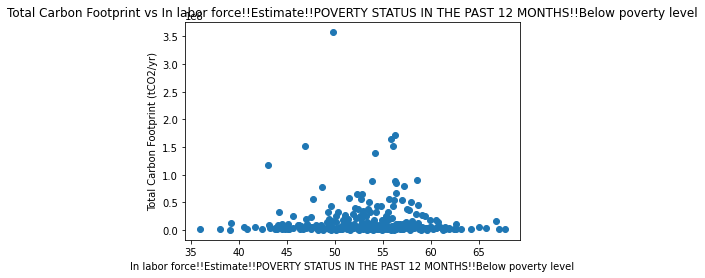

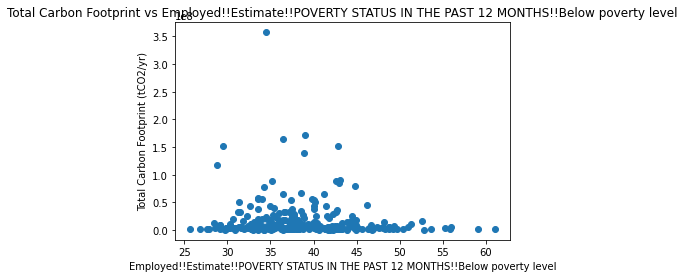

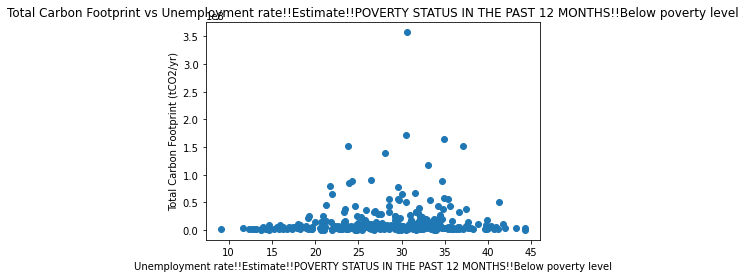

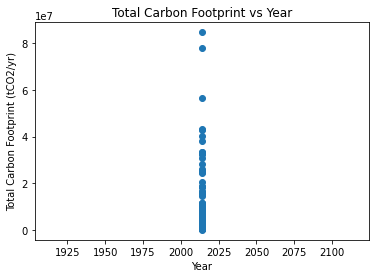

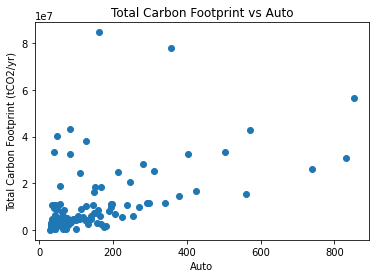

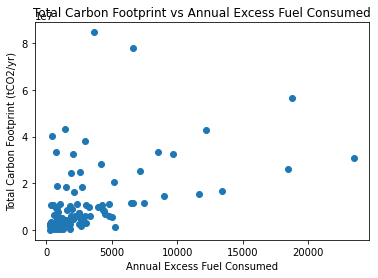

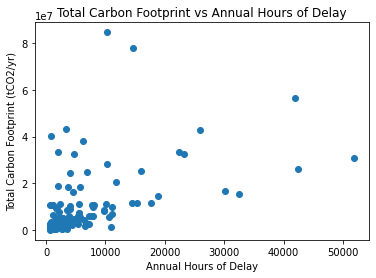

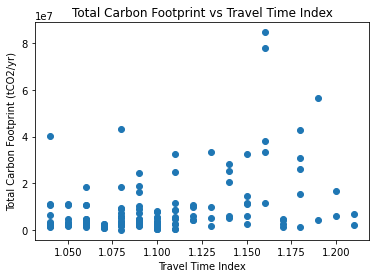

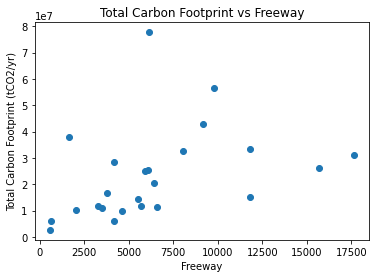

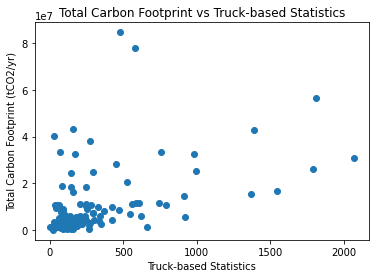

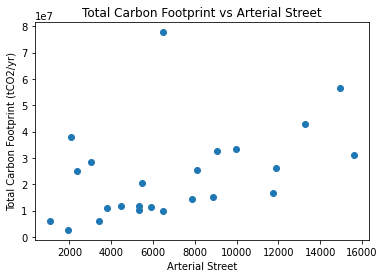

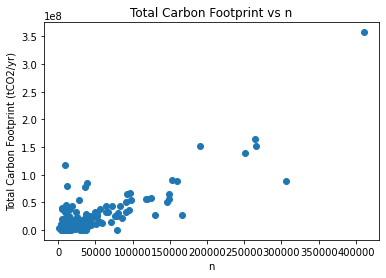

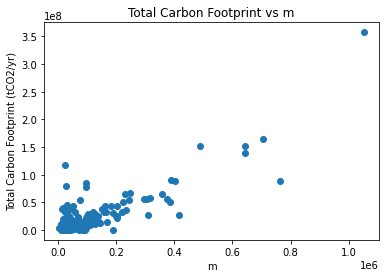

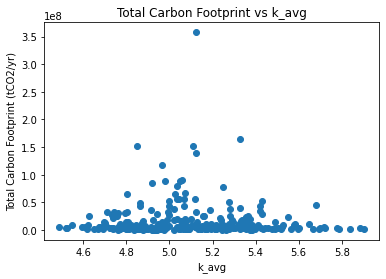

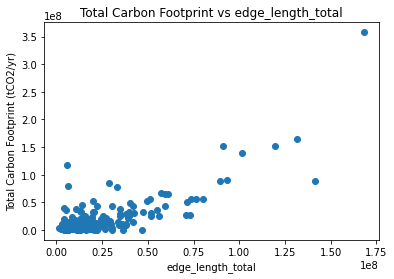

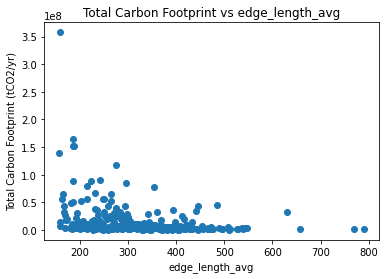

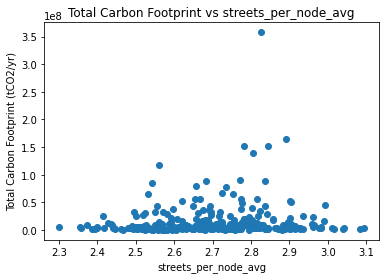

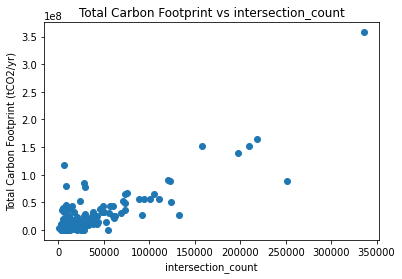

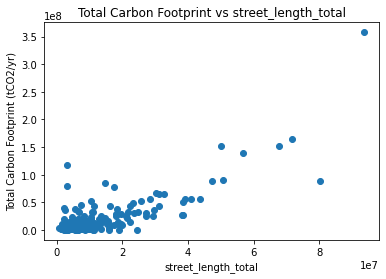

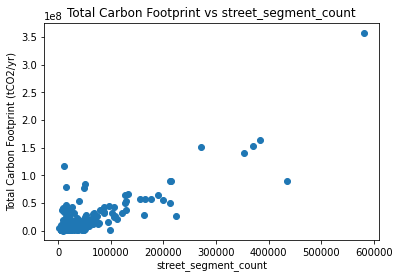

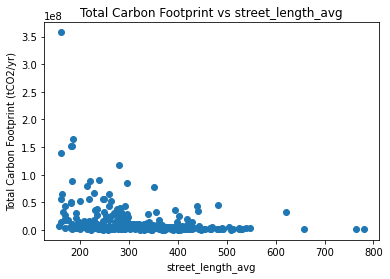

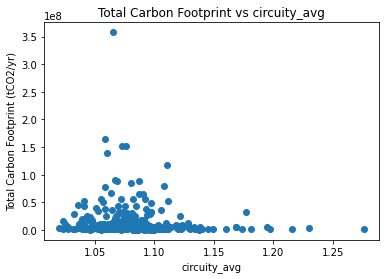

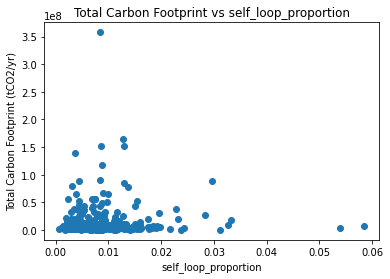

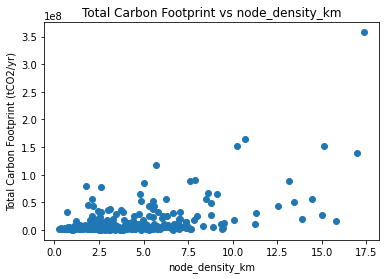

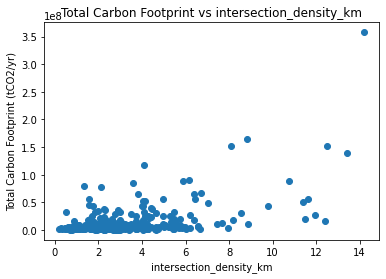

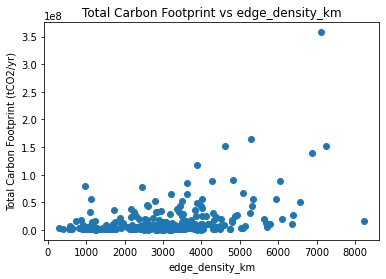

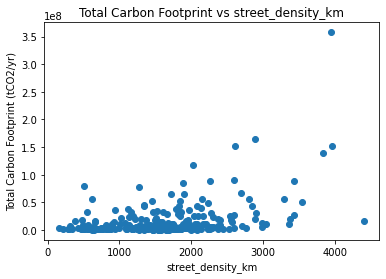

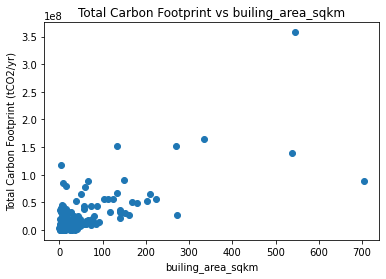

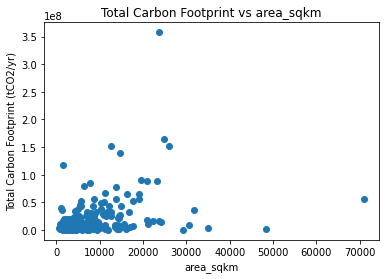

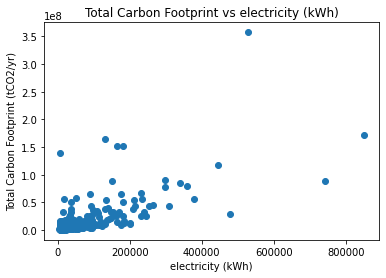

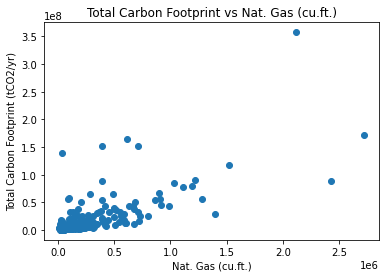

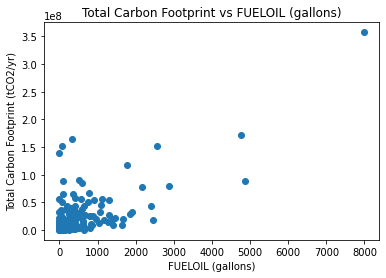

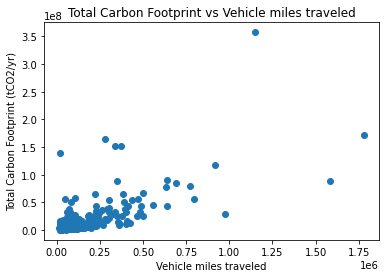

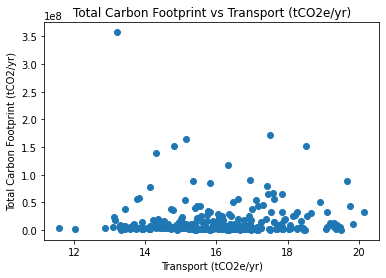

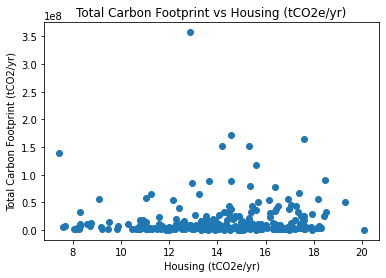

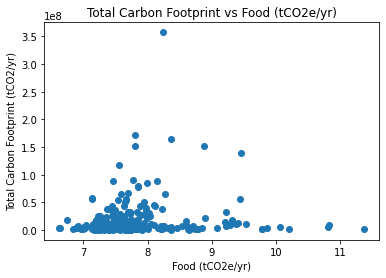

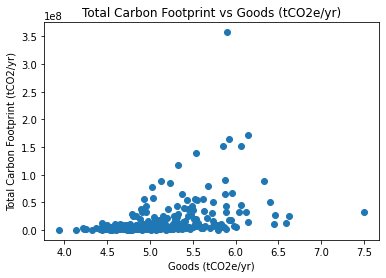

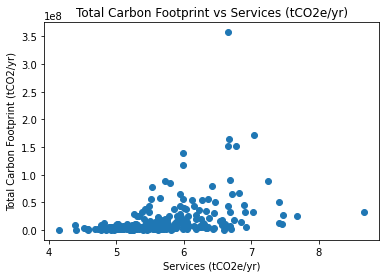

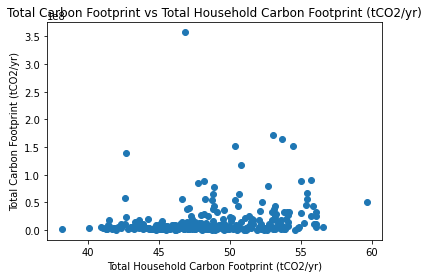

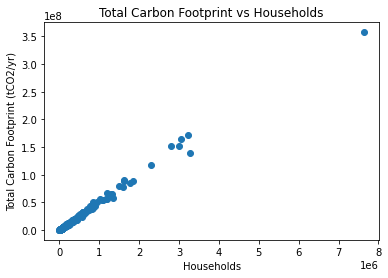

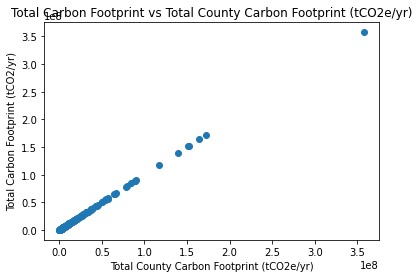

In [7]:
for column in cols_to_plot.columns:
    if column != 'y':
        x = df[column]
        plt.scatter(x, y)
        plt.xlabel(column)
        plt.ylabel('Total Carbon Footprint (tCO2/yr)')
        plt.title('Total Carbon Footprint vs ' + column)
        plt.show()

In [13]:
for column in cols_to_plot.columns:
    if column != 'y':
        x = df[column]
        mic(x, y)

NameError: name 'mic' is not defined